In [ ]:
import os

import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy



In [3]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [4]:
def get_stf(scardec_name, wanted_type = 'fctopt'):
    db = combined[combined['scardec_name']==scardec_name]

    time = []
    momentrate = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time.append(float(split[0]))
        momentrate.append(float(split[1]))

    momentrate = np.array(momentrate)
    return momentrate, time, db

In [5]:
# looks for time value of root
def f3(end_time, total_moment, time_opt, momentrate_opt, start, points_before_zero, proportion = 0.1):
    dx = time_opt[1]-time_opt[0]
    end_window = (end_time/dx)+points_before_zero
    end = int(np.floor(end_window))
    short = scipy.integrate.simpson(momentrate_opt[start:end], dx = dx)
    return short-(total_moment*proportion)

In [6]:
def plot_scatter_figures(proportion, root_times, moments, durations):
    root_times = np.array(root_times)
    moments = np.array(moments)
    durations = np.array(durations)

    plt.scatter(root_times, durations, c = np.log10(moments), cmap = cmc.batlow, alpha = 0.5)
    plt.ylabel('Duration (s)')
    plt.xlabel(f'time to release {proportion*100}% of moment (s)')
    plt.colorbar(label = 'log10(moment)')
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/time_for_{proportion*100}_percent_moment_against_duration.png')
    plt.close()

    plt.scatter(root_times, np.log10(moments), c = durations, cmap = cmc.batlow, alpha = 0.5)
    plt.ylabel('log10(moment)')
    plt.xlabel(f'time to release {proportion*100}% of moment (s)')
    plt.colorbar(label = 'Duration (s)')
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/time_for_{proportion*100}_percent_moment_against_moment.png')
    plt.close()

    plt.scatter(root_times/durations, np.log10(moments), c = durations, cmap = cmc.batlow, alpha = 0.5)
    plt.ylabel('log10(moment)')
    plt.xlabel(f'proportion of duration to release {proportion*100}% of moment')
    plt.colorbar()
    plt.xlim(0, 1)
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/fraction_of_duration_for_{proportion*100}_percent_moment_against_moment.png')
    plt.close()

In [7]:
def plot_hist_figures(proportion, root_times, durations):
    root_times = np.array(root_times)
    durations = np.array(durations)

    plt.hist(root_times/durations, bins = 100)

    plt.ylabel('Frequency')
    plt.xlabel(f'Proportion of duration to release {proportion*100}% of moment')
    plt.xlim(0, 1)
    plt.show()
    #plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/histogram_fraction_of_duration_for_{proportion*100}_percent_moment.png')
    #plt.close()

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


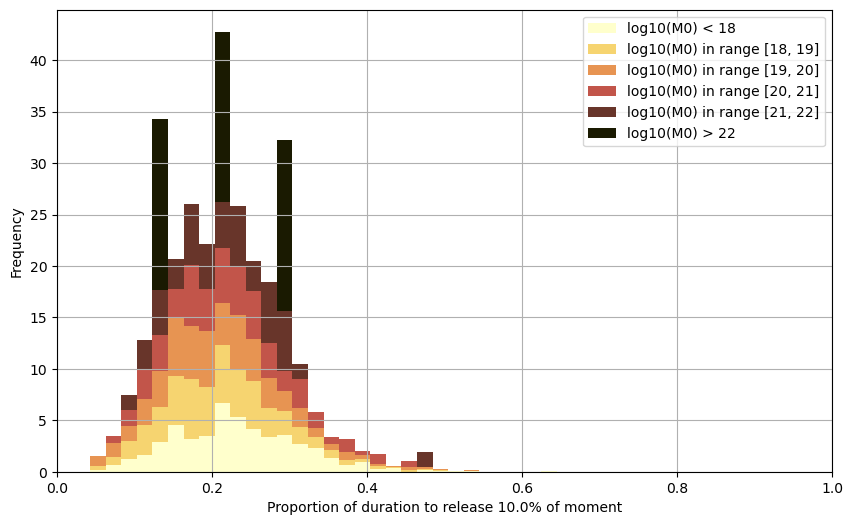

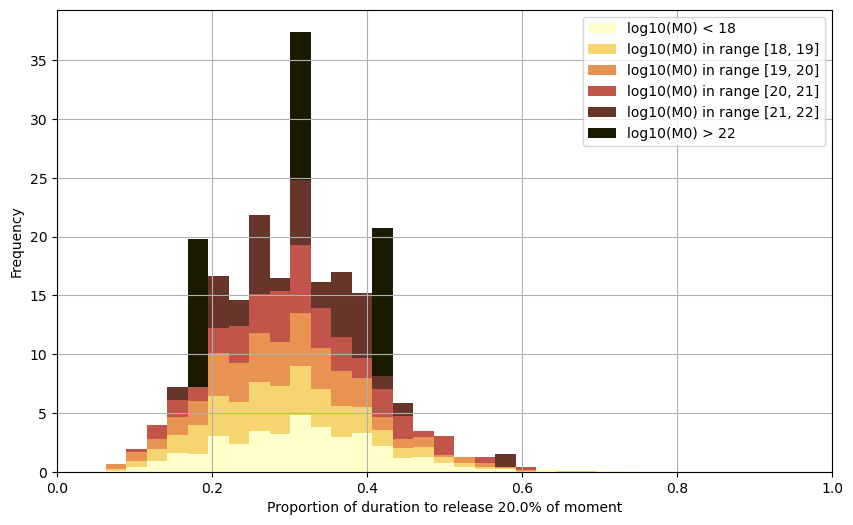

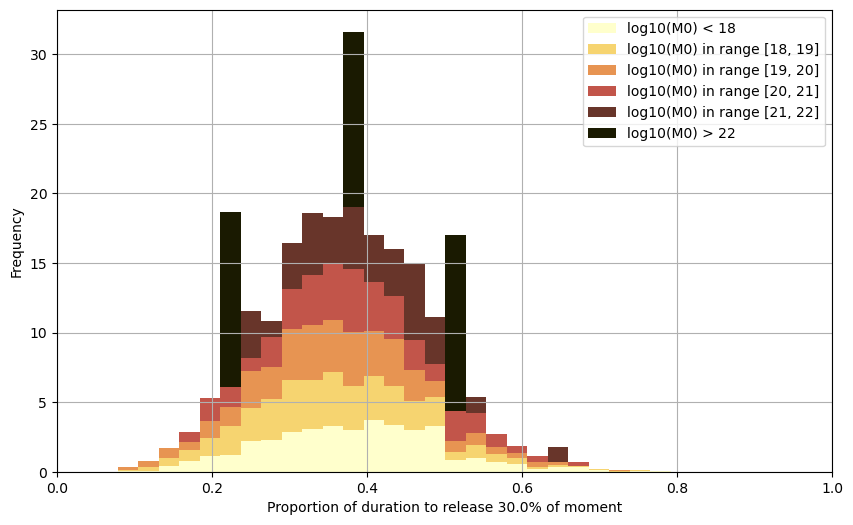

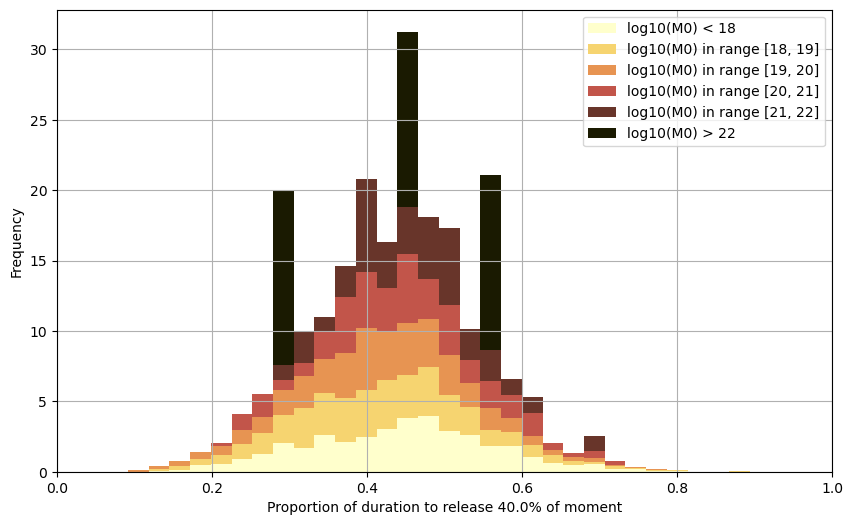

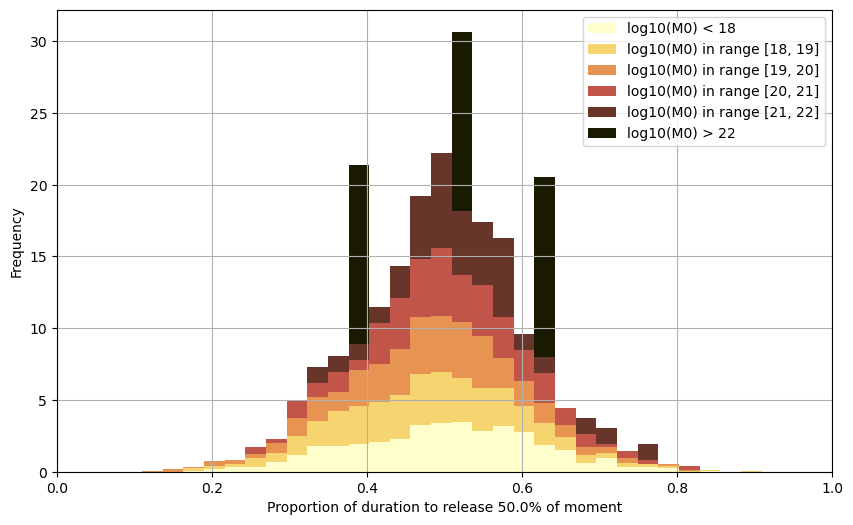

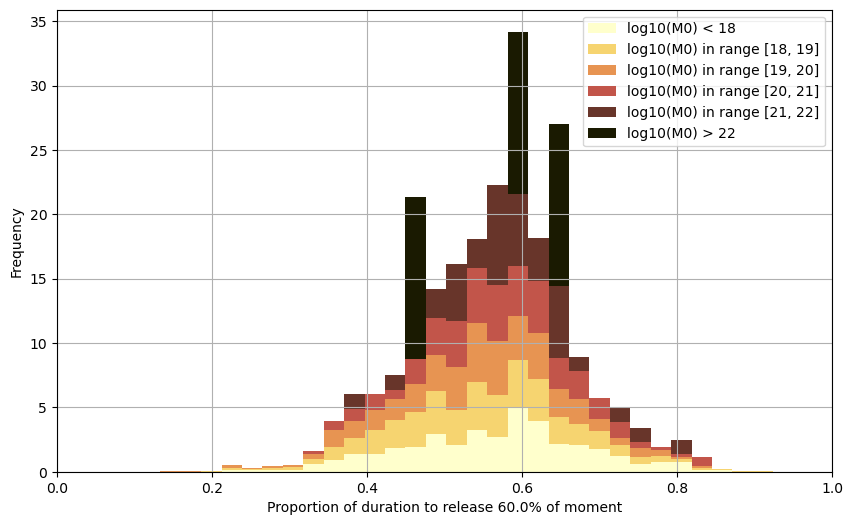

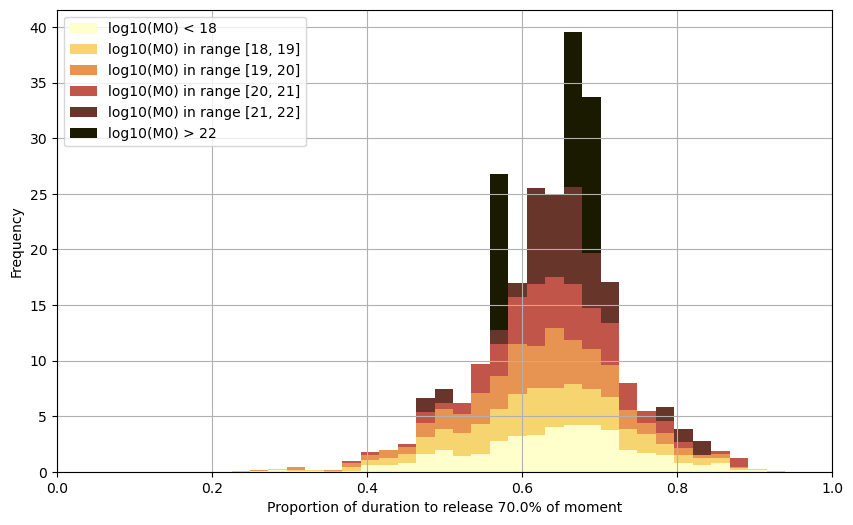

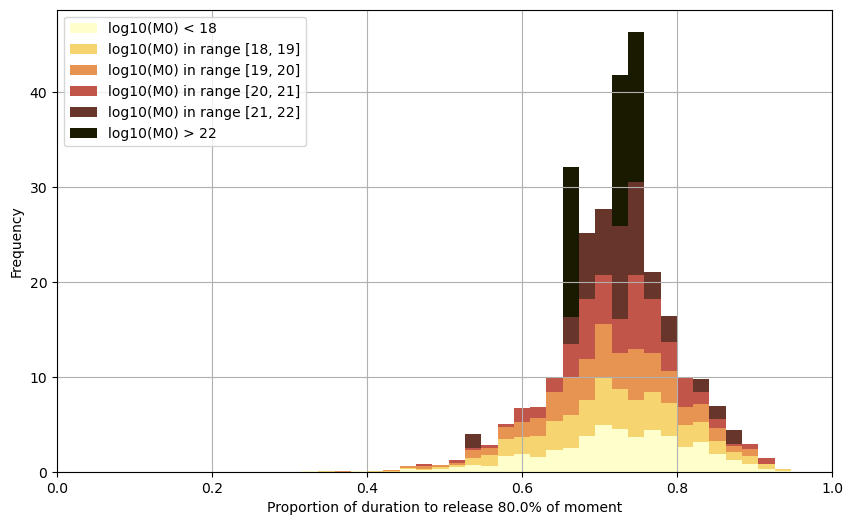

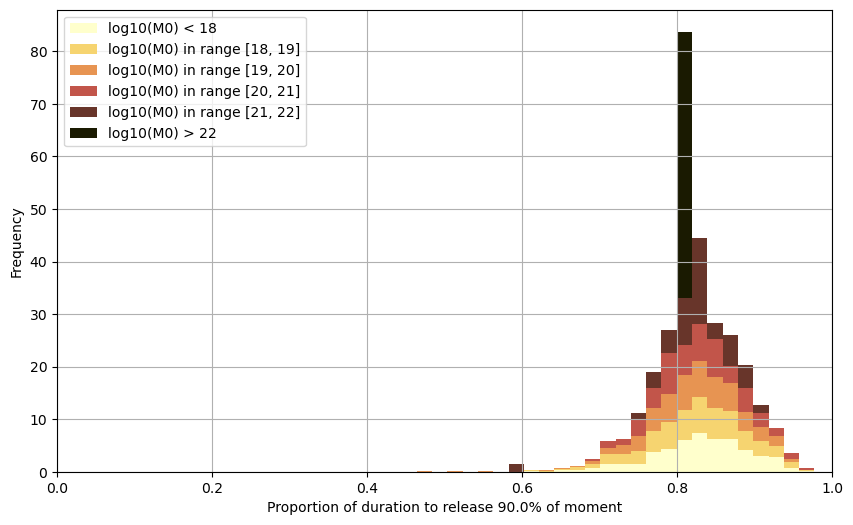

In [8]:
proportions_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

all_durations = []
all_root_times = []
all_moments = []
all_relative_root_times = []

for proportion in proportions_list:
    print(proportion)
    durations = []
    root_times = []
    relative_root_times = []

    diff = []
    moments = []

    for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
        #print(scardec_name)
        momentrate_opt, time_opt, db = get_stf(scardec_name)

        not_zero = np.where(momentrate_opt > 0)[0]

        dx = time_opt[1]-time_opt[0]

        start = min(not_zero)
        end = max(not_zero)
        points_before_zero = abs(min(time_opt)/dx)

        duration = time_opt[end] - time_opt[start]
        durations.append(duration)

        start_time = time_opt[start]
        end_time = time_opt[end]

        total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])
        moments.append(total_moment)
        root, r = scipy.optimize.bisect(f3,
                                        start_time+dx,
                                        end_time,
                                        rtol = 1e-6,
                                        full_output = True,
                                        args = (total_moment,
                                                time_opt,
                                                momentrate_opt,
                                                start,
                                                points_before_zero,
                                                proportion,))
        root_idx = np.floor(root/dx)
        root_time = root_idx*dx
        root_times.append(root_time)
        relative_root_times.append(root_time-start_time)

        if root_time-start_time > duration:
            print('root time greater than duration, proportion:', proportion)
            print(scardec_name)

    root_times = np.array(root_times)
    relative_root_times = np.array(relative_root_times)
    durations = np.array(durations)
    moments = np.log10(np.array(moments))

    rel_root_times = relative_root_times/durations

#    plt.hist([rel_root_times[np.where((moments > 18) & (moments < 19))[0]]])
    t_18 = rel_root_times[np.where((moments < 18))[0]]
    t_18_19 = rel_root_times[np.where((moments > 18) & (moments < 19))[0]]
    t_19_20 = rel_root_times[np.where((moments > 19) & (moments < 20))[0]]
    t_20_21 = rel_root_times[np.where((moments > 20) & (moments < 21))[0]]
    t_21_22 = rel_root_times[np.where((moments > 21) & (moments < 22))[0]]
    t_22 = rel_root_times[np.where((moments > 22))[0]]

    columns = ['log10(M0) < 18',
               'log10(M0) in range [18, 19]',
                'log10(M0) in range [19, 20]',
                'log10(M0) in range [20, 21]',
                'log10(M0) in range [21, 22]',
                'log10(M0) > 22']
    df = pd.concat([pd.DataFrame(a, columns=[f'{i}, log10(M0) in range [{i+17}, {i+18}]']) for i, a in enumerate([t_18, t_18_19, t_19_20, t_20_21, t_21_22, t_22])], axis=1)
    df.columns = columns

    df.plot.hist(stacked=True, bins=30, density=True, figsize=(10, 6), grid=True, colormap = cmc.lajolla)

    plt.ylabel('Frequency')
    plt.xlabel(f'Proportion of duration to release {proportion*100}% of moment')
    plt.xlim(0, 1)
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/stacked_histogram_fraction_of_duration_for_{proportion*100}_percent_moment.png')

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


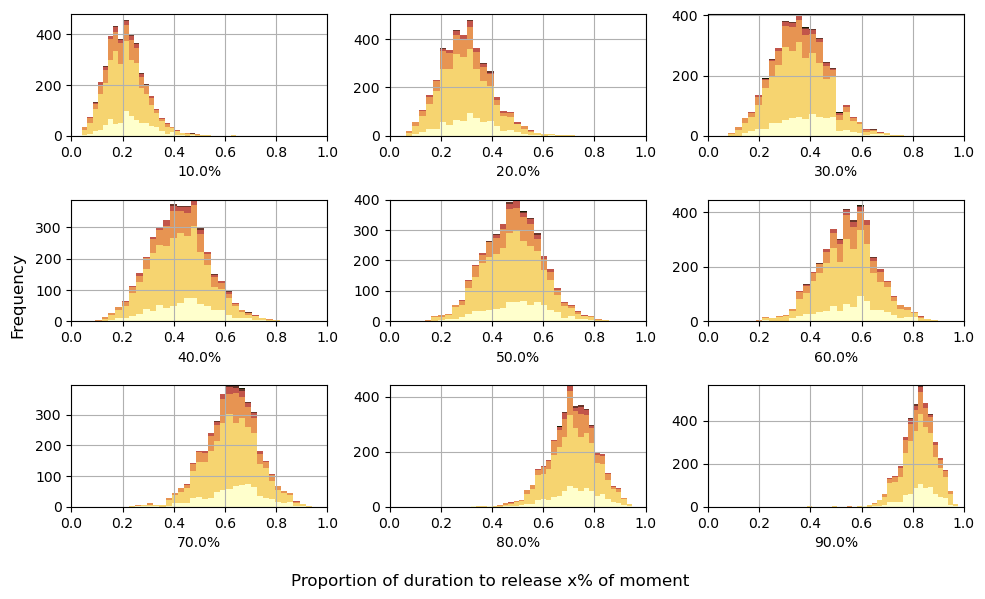

In [ ]:
proportions_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fig, axs = plt.subplots(3,3)
all_durations = []
all_root_times = []
all_moments = []
all_relative_root_times = []

for i, proportion in enumerate(proportions_list):
    ax = axs[i//3][i%3]
    print(proportion)
    durations = []
    root_times = []
    relative_root_times = []

    diff = []
    moments = []

    for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
        #print(scardec_name)
        momentrate_opt, time_opt, db = get_stf(scardec_name)

        not_zero = np.where(momentrate_opt > 0)[0]

        dx = time_opt[1]-time_opt[0]

        start = min(not_zero)
        end = max(not_zero)
        points_before_zero = abs(min(time_opt)/dx)

        duration = time_opt[end] - time_opt[start]
        durations.append(duration)

        start_time = time_opt[start]
        end_time = time_opt[end]

        total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])
        moments.append(total_moment)
        root, r = scipy.optimize.bisect(f3,
                                        start_time+dx,
                                        end_time,
                                        rtol = 1e-6,
                                        full_output = True,
                                        args = (total_moment,
                                                time_opt,
                                                momentrate_opt,
                                                start,
                                                points_before_zero,
                                                proportion,))
        root_idx = np.floor(root/dx)
        root_time = root_idx*dx
        root_times.append(root_time)
        relative_root_times.append(root_time-start_time)

        if root_time-start_time > duration:
            print('root time greater than duration, proportion:', proportion)
            print(scardec_name)

    root_times = np.array(root_times)
    relative_root_times = np.array(relative_root_times)
    durations = np.array(durations)
    moments = np.log10(np.array(moments))

    rel_root_times = relative_root_times/durations

#    plt.hist([rel_root_times[np.where((moments > 18) & (moments < 19))[0]]])
    t_18 = rel_root_times[np.where((moments < 18))[0]]
    t_18_19 = rel_root_times[np.where((moments > 18) & (moments < 19))[0]]
    t_19_20 = rel_root_times[np.where((moments > 19) & (moments < 20))[0]]
    t_20_21 = rel_root_times[np.where((moments > 20) & (moments < 21))[0]]
    t_21_22 = rel_root_times[np.where((moments > 21) & (moments < 22))[0]]
    t_22 = rel_root_times[np.where((moments > 22))[0]]

    columns = ['log10(M0) < 18',
               'log10(M0) in range [18, 19]',
                'log10(M0) in range [19, 20]',
                'log10(M0) in range [20, 21]',
                'log10(M0) in range [21, 22]',
                'log10(M0) > 22']
    df = pd.concat([pd.DataFrame(a, columns=[f'{i}, log10(M0) in range [{i+17}, {i+18}]']) for i, a in enumerate([t_18, t_18_19, t_19_20, t_20_21, t_21_22, t_22])], axis=1)
    df.columns = columns

    df.plot.hist(ax = ax, stacked=True, bins=30,
                 density=False, figsize=(10, 6),
                 grid=True, colormap = cmc.lajolla,
                 legend = False, ylabel = '', log = False)

    ax.set_xlabel(f'{proportion*100}%')
    ax.set_xlim(0, 1)
#plt.show()

fig.supxlabel('Proportion of duration to release x% of moment', ha='center')
fig.supylabel('Frequency', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/moment_intervals/stacked_histogram_fraction_of_duration_for_proportion_moment_combined.png')